In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import aubio
import matplotlib.pyplot as plt
import pandas as pd
import glob
 
from IPython import display
from pathlib import PurePath

import vxs
import vxs.utils as vxsu

In [2]:
BEATBOXSET1_DIR = '../data/beatboxset1'
AVP_DIR = '../data/avp-dataset/AVP_Dataset'

plt.rcParams.update({'font.size': 16})    

In [3]:
beatboxset1_DR = vxs.Beatbox1TrackSet(BEATBOXSET1_DIR, annotation_type='DR')
beatboxset1_HT = vxs.Beatbox1TrackSet(BEATBOXSET1_DIR, annotation_type='HT')

In [4]:
track_sh, onsets_DR = beatboxset1_DR.get('callout_luckeymonkey')
_, onsets_HT = beatboxset1_HT.get('callout_luckeymonkey')

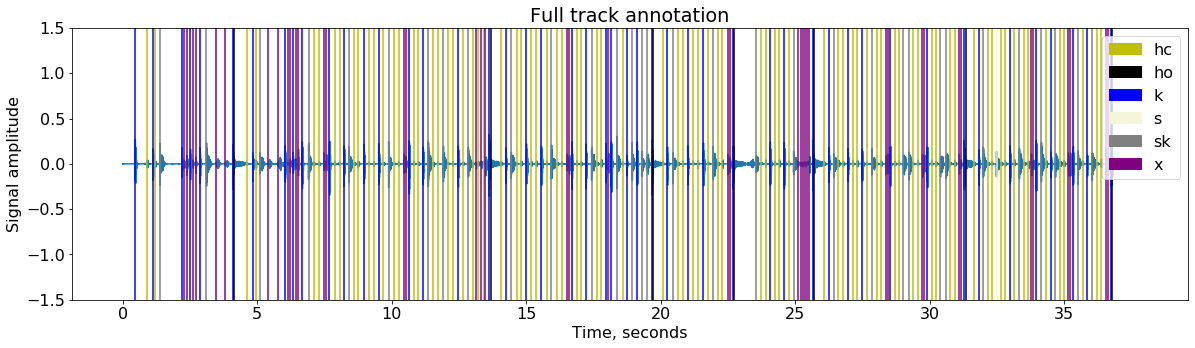

In [5]:
vxsu.plot_track(track_sh, onsets=onsets_DR, color_events=True, title='Full track annotation')

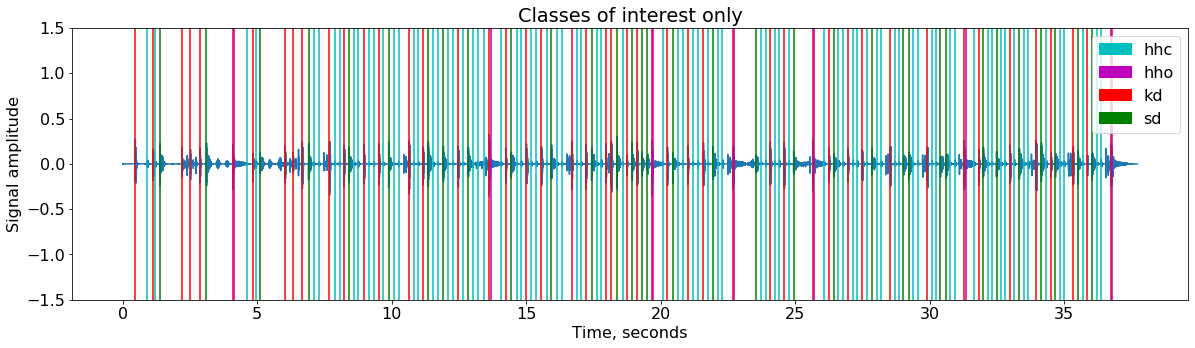

In [6]:
onsets_DR_cleaned = vxs.map_annotation(onsets_DR, vxs.constants.BEATBOXSET1_CLASS_MAP)
vxsu.plot_track(track_sh, onsets=onsets_DR_cleaned, color_events=True, title='Classes of interest only')

In [7]:
vxsu.play_audio(track_sh)

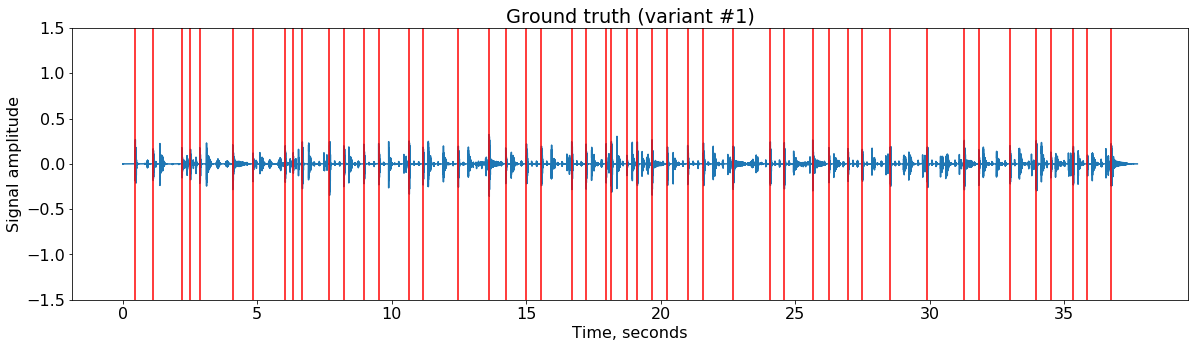

In [15]:
kick_events = vxsu.plot_track(track_sh, onsets=onsets_DR, event_type='kd', title='Ground truth (variant #1)', return_events=True)

In [16]:
classes = onsets_DR['class'].unique()
classes

array(['kd', 'hhc', 'sd', '', 'hho'], dtype=object)

In [17]:
onsets_HT['class'].unique()

array(['k', 'hc', 'sk', 'ho', 't', 'br'], dtype=object)

In [18]:
df = pd.DataFrame(columns=classes, index=classes, dtype=int).fillna(0)

In [19]:
vxsu.play_audio(track_sh)

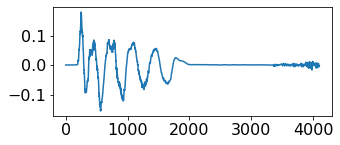

In [20]:
segm = vxsu.plot_segment(track_sh, kick_events[2])

In [22]:
vxsu.play_audio(segm)

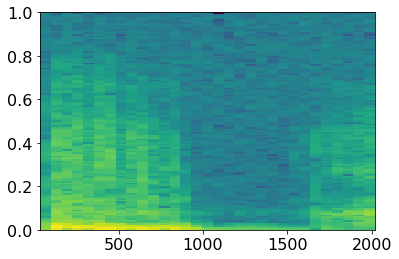

In [23]:
_ = plt.specgram(segm.wave, Fs=2)

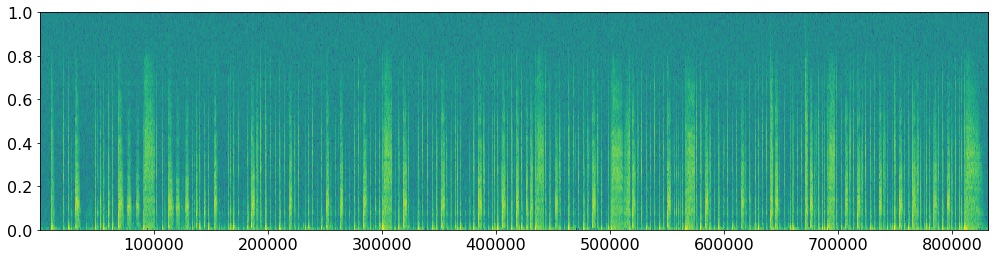

In [24]:
fig = plt.figure(figsize=(17,4))
_ = plt.specgram(track_sh.wave, Fs=2)

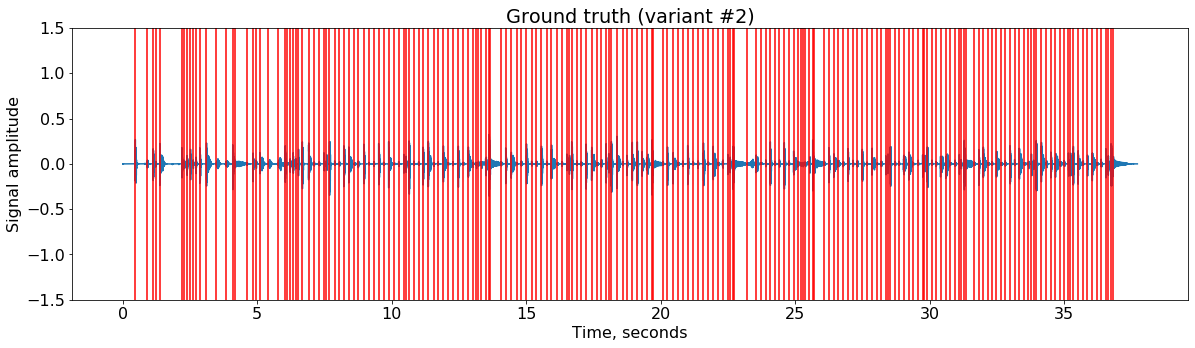

In [25]:
vxsu.plot_track(track_sh, onsets=onsets_HT, title='Ground truth (variant #2)')

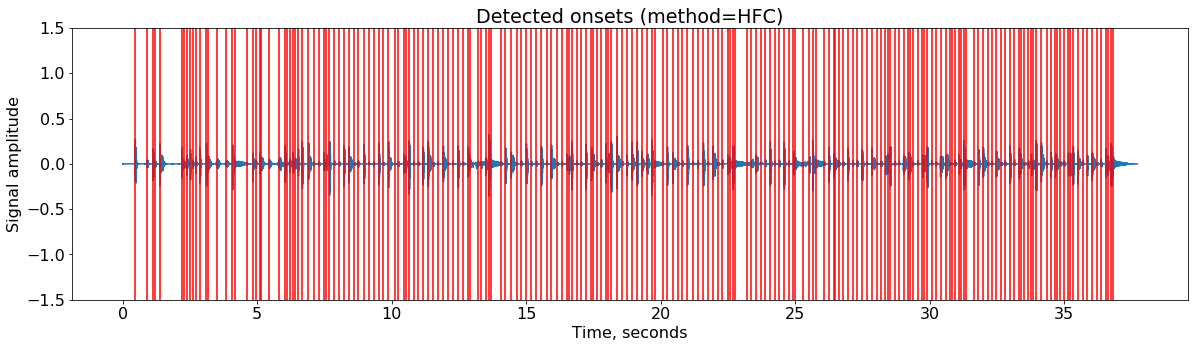

In [26]:
onsets_detected_hfc = vxs.detect_onsets(track_sh, method='hfc')
vxsu.plot_track(track_sh, onsets=onsets_detected_hfc, title='Detected onsets (method=HFC)')

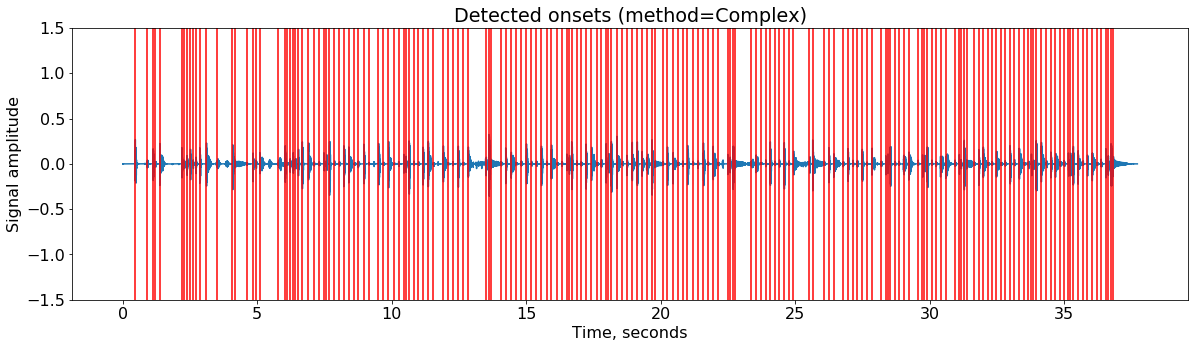

In [27]:
onsets_detected_cp = vxs.detect_onsets(track_sh, method='complex')
vxsu.plot_track(track_sh, onsets=onsets_detected_cp, title='Detected onsets (method=Complex)')

In [28]:
beats, tempo = vxs.detect_beats(track_sh, method='complex')
print(tempo)

131.9108706933153


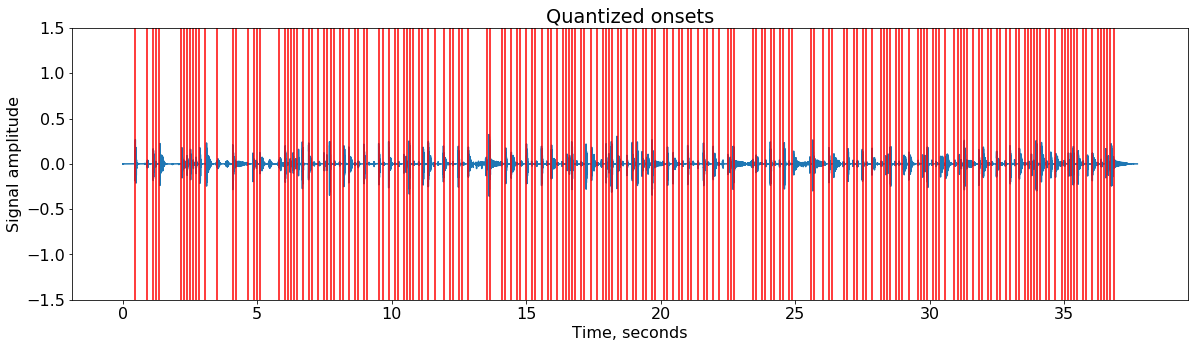

In [30]:
onsets_steps, onsets_times, onsets_times_qq = vxs.quantize_onsets(onsets_detected_cp['time'].values, tempo)
vxsu.plot_track(track_sh, onsets=onsets_times_qq, title='Quantized onsets')

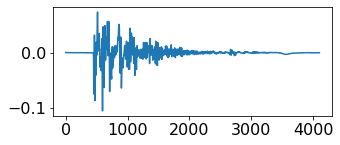

In [31]:
segm = vxsu.plot_segment(track_sh, onsets_detected_cp['time'][10])

In [32]:
vxsu.play_audio(segm)

In [38]:
vxs.onsets_F1_score(onsets_detected_hfc['time'].values, onsets_DR['time'].values, ms_threshold=10)

0.82903981264637

In [39]:
scores_DR = vxs.dataset_onset_scores(beatboxset1_DR, methods=['hfc', 'complex', 'specflux'])
scores_HT = vxs.dataset_onset_scores(beatboxset1_HT, methods=['hfc', 'complex', 'specflux'])

Detecting onsets: 14it [00:15,  1.09s/it]
Detecting onsets: 14it [00:10,  1.32it/s]


In [40]:
bbs_scores = pd.merge(scores_DR, scores_HT, on='track', suffixes=('_DR', '_HT'))

In [41]:
bbs_scores

track  hfc_F1_DR  hfc_prec_DR  hfc_rec_DR  complex_F1_DR  \
0         battleclip_daq   0.941989     0.921622    0.963277       0.939007   
1          callout_mouss   0.944444     0.916168    0.974522       0.948718   
2        putfile_pepouni   0.865568     0.777259    0.976517       0.873462   
3          callout_azeem   0.932886     0.917492    0.948805       0.926746   
4   callout_luckeymonkey   0.946136     0.935185    0.957346       0.942928   
5        putfile_william   0.954424     0.927083    0.983425       0.988950   
6              snare_hex   0.752137     0.619718    0.956522       0.877551   
7      callout_Pneumatic   0.964187     0.940860    0.988701       0.983051   
8     callout_Turn-Table   0.907801     0.836601    0.992248       0.933824   
9            putfile_bui   0.901564     0.829103    0.987903       0.921624   
10         putfile_vonny   0.892857     0.808824    0.996377       0.919463   
11         callout_adiao   0.971751     0.959108    0.984733       0.971319   
12  putfile_dbztenkaichi   0.844444     0.772727    0.930836       0.885517   
13          callout_mcld   0.859375     0.774648    0.964912       0.933333   

    complex_prec_DR  complex_rec_DR  specflux_F1_DR  specflux_prec_DR  \
0          0.943020        0.935028        0.927497          0.899204   
1          0.954839        0.942675        0.897959          0.827957   
2          0.792663        0.972603        0.836120          0.729927   
3          0.925170        0.928328        0.918469          0.896104   
4          0.989583        0.900474        0.951501          0.927928   
5          0.988950        0.988950        0.896725          0.824074   
6          0.826923        0.934783        0.715447          0.571429   
7          0.983051        0.983051        0.953678          0.921053   
8          0.888112        0.984496        0.851351          0.754491   
9          0.866785        0.983871        0.862989          0.772293   
10         0.856250        0.992754        0.888169          0.803519   
11         0.973180        0.969466        0.950820          0.909408   
12         0.849206        0.925072        0.818408          0.719912   
13         0.925287        0.941520        0.852868          0.743478   

    specflux_rec_DR  hfc_F1_HT  hfc_prec_HT  hfc_rec_HT  complex_F1_HT  \
0          0.957627   0.916667     0.891892    0.942857       0.924394   
1          0.980892   0.937500     0.898204    0.980392       0.941558   
2          0.978474   0.852146     0.834891    0.870130       0.849558   
3          0.941980   0.923333     0.914191    0.932660       0.927242   
4          0.976303   0.953052     0.939815    0.966667       0.945274   
5          0.983425   0.957219     0.932292    0.983516       0.991736   
6          0.956522   0.765217     0.619718    1.000000       0.916667   
7          0.988701   0.955307     0.919355    0.994186       0.968481   
8          0.976744   0.914676     0.875817    0.957143       0.932862   
9          0.977823   0.892606     0.857868    0.930275       0.915162   
10         0.992754   0.908546     0.891176    0.926606       0.911901   
11         0.996183   0.965909     0.947955    0.984556       0.965385   
12         0.948127   0.819427     0.787081    0.854545       0.865007   
13         1.000000   0.863874     0.774648    0.976331       0.938776   

    complex_prec_HT  complex_rec_HT  specflux_F1_HT  specflux_prec_HT  \
0          0.923077        0.925714        0.905089          0.872679   
1          0.935484        0.947712        0.884956          0.806452   
2          0.842105        0.857143        0.822444          0.781022   
3          0.931973        0.922559        0.905785          0.889610   
4          0.989583        0.904762        0.958333          0.932432   
5          0.994475        0.989011        0.899497          0.828704   
6          0.846154        1.000000        0.710744          0.558442   
7          0.954802        0.982558       

In [42]:
bbs_scores.mean()

hfc_F1_DR           0.905683
hfc_prec_DR         0.852600
hfc_rec_DR          0.971866
complex_F1_DR       0.931821
complex_prec_DR     0.911644
complex_rec_DR      0.955934
specflux_F1_DR      0.880143
specflux_prec_DR    0.807198
specflux_rec_DR     0.975397
hfc_F1_HT           0.901820
hfc_prec_HT         0.863207
hfc_rec_HT          0.949990
complex_F1_HT       0.928143
complex_prec_HT     0.923081
complex_rec_HT      0.934546
specflux_F1_HT      0.868718
specflux_prec_HT    0.809891
specflux_rec_HT     0.944491
dtype: float64

In [43]:
bbs_scores.std()

hfc_F1_DR           0.059889
hfc_prec_DR         0.095920
hfc_rec_DR          0.018950
complex_F1_DR       0.035834
complex_prec_DR     0.065058
complex_rec_DR      0.029478
specflux_F1_DR      0.064810
specflux_prec_DR    0.100887
specflux_rec_DR     0.017890
hfc_F1_HT           0.058356
hfc_prec_HT         0.087846
hfc_rec_HT          0.044285
complex_F1_HT       0.037629
complex_prec_HT     0.046198
complex_rec_HT      0.044273
specflux_F1_HT      0.063930
specflux_prec_HT    0.095041
specflux_rec_HT     0.042342
dtype: float64

In [44]:
def prec_rec_bar_plot(scores, labels, precs, recs, title='precision/recall'):
    mean_scores = scores.mean()
    precisions = mean_scores[precs]
    recalls = mean_scores[recs]
    
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.bar(x - width/2, precisions, width, label='Precision')
    rects2 = ax.bar(x + width/2, recalls, width, label='Recall')

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

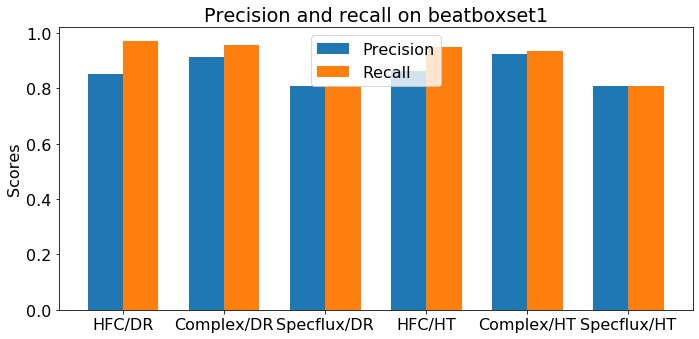

In [45]:
labels = ['HFC/DR', 'Complex/DR', 'Specflux/DR', 'HFC/HT', 'Complex/HT', 'Specflux/HT']
precs = ['hfc_prec_DR', 'complex_prec_DR', 'specflux_prec_DR', 'hfc_prec_HT', 'complex_prec_HT', 'specflux_prec_HT']
recs = ['hfc_rec_DR', 'complex_rec_DR', 'specflux_prec_DR', 'hfc_rec_HT', 'complex_rec_HT', 'specflux_prec_HT']

prec_rec_bar_plot(bbs_scores, labels, precs, recs, title='Precision and recall on beatboxset1')

In [46]:
avp_set = vxs.AVPTrackSet(AVP_DIR)
avp_scores = vxs.dataset_onset_scores(avp_set, methods=['hfc', 'complex', 'specflux'])

Detecting onsets: 265it [00:57,  4.64it/s]


In [47]:
avp_scores

track    hfc_F1  hfc_prec   hfc_rec  complex_F1  \
0    P27_Improvisation_Personal  0.876712  0.800000  0.969697    0.927536   
1            P27_Snare_Personal  1.000000  1.000000  1.000000    0.979592   
2         P27_HHopened_Personal  0.938776  0.884615  1.000000    0.956522   
3         P27_HHclosed_Personal  0.945455  0.896552  1.000000    0.980392   
4             P27_Kick_Personal  0.774194  0.631579  1.000000    0.923077   
..                          ...       ...       ...       ...         ...   
260           P3_HHopened_Fixed  0.958333  0.920000  1.000000    0.978723   
261               P3_Kick_Fixed  0.754098  0.605263  1.000000    0.938776   
262           P3_HHclosed_Fixed  0.960000  0.923077  1.000000    0.979592   
263              P3_Snare_Fixed  0.786885  0.648649  1.000000    0.923077   
264      P3_Improvisation_Fixed  0.727273  0.571429  1.000000    0.888889   

     complex_prec  complex_rec  specflux_F1  specflux_prec  specflux_rec  
0        0.888889     0.969697     0.815287       0.703297      0.969697  
1        0.960000     1.000000     1.000000       1.000000      1.000000  
2        0.956522     0.956522     0.916667       0.880000      0.956522  
3        1.000000     0.961538     0.909091       0.862069      0.961538  
4        0.857143     1.000000     0.750000       0.600000      1.000000  
..            ...          ...          ...            ...           ...  
260      0.958333     1.000000     0.836364       0.718750      1.000000  
261      0.884615     1.000000     0.724138       0.600000      0.913043  
262      0.960000     1.000000     0.923077       0.857143      1.000000  
263      0.857143     1.000000     0.738462       0.585366      1.000000  
264      0.800000     1.000000     0.613333       0.450980      0.958333  

[265 rows x 10 columns]

In [48]:
avp_scores[avp_scores['hfc_F1'] == 0]

track  hfc_F1  hfc_prec  hfc_rec  complex_F1  complex_prec  \
176  P4_HHclosed_Fixed     0.0       0.0      0.0         0.0           0.0   

     complex_rec  specflux_F1  specflux_prec  specflux_rec  
176          0.0          0.0            0.0           0.0

In [49]:
track, annotation = avp_set.get('P8_HHopened_Personal')
onsets_pred = vxs.detect_onsets(track, method='complex')

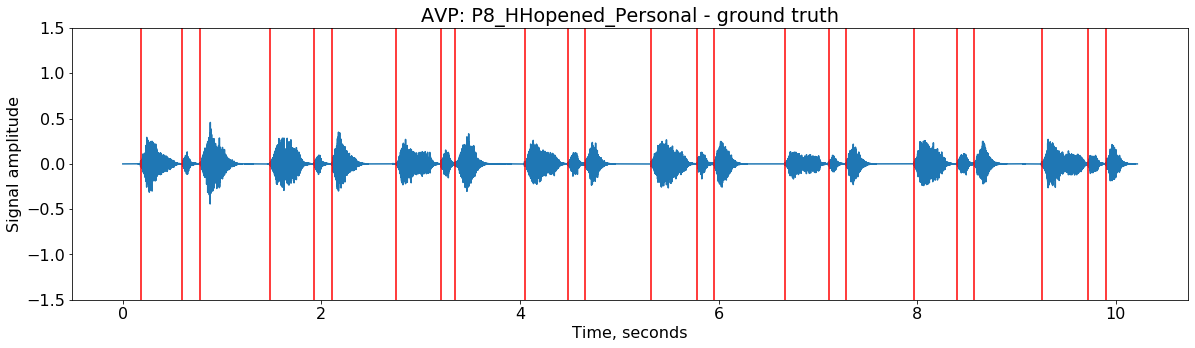

In [50]:
vxsu.plot_track(track, onsets=annotation, title='AVP: P8_HHopened_Personal - ground truth')

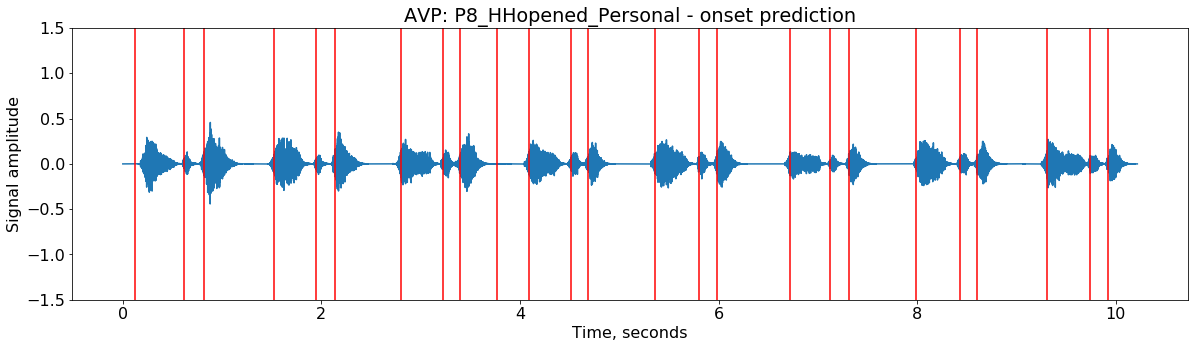

In [51]:
vxsu.plot_track(track, onsets=onsets_pred, title='AVP: P8_HHopened_Personal - onset prediction')

In [52]:
beats, tempo = vxs.detect_beats(track, method='complex')
print(tempo)

94.26098029180191


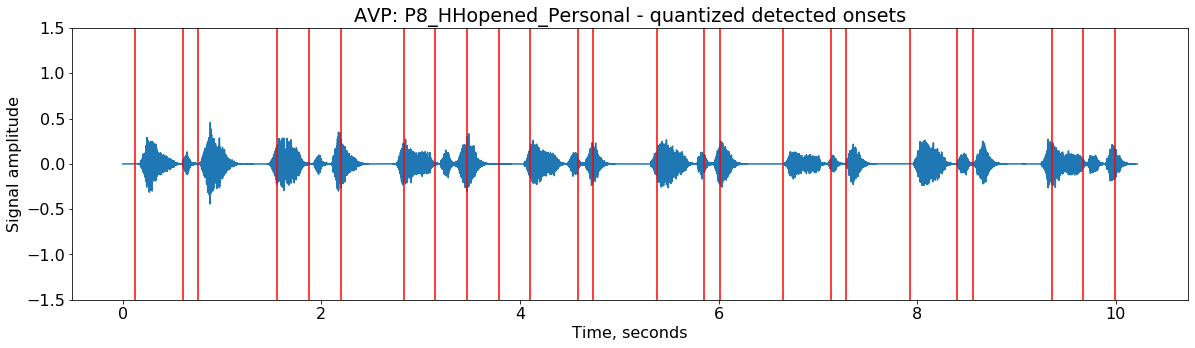

In [54]:
onsets_steps, onsets_t, onsets_q = vxs.quantize_onsets(onsets_pred['time'].values, tempo)
vxsu.plot_track(track, onsets=onsets_q, title='AVP: P8_HHopened_Personal - quantized detected onsets')

In [55]:
onsets_steps

array([ 0,  3,  4,  9, 11, 13, 17, 19, 21, 23, 25, 28, 29, 33, 36, 37, 41,
       44, 45, 49, 52, 53, 58, 60, 62])

In [56]:
avp_scores.mean()

hfc_F1           0.883614
hfc_prec         0.810385
hfc_rec          0.984464
complex_F1       0.931286
complex_prec     0.911859
complex_rec      0.957251
specflux_F1      0.852888
specflux_prec    0.763089
specflux_rec     0.981777
dtype: float64

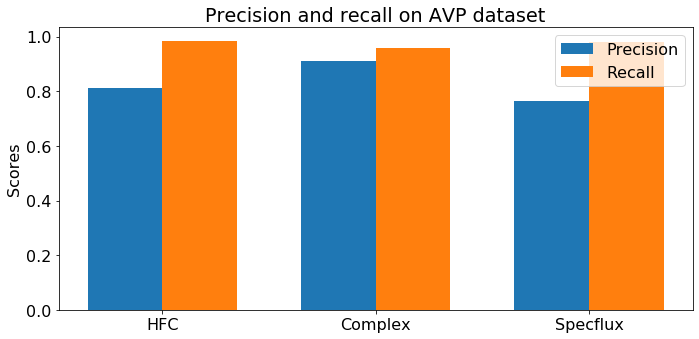

In [57]:
labels = ['HFC', 'Complex', 'Specflux']
precs = ['hfc_prec', 'complex_prec', 'specflux_prec']
recs = ['hfc_rec', 'complex_rec', 'specflux_rec']

prec_rec_bar_plot(avp_scores, labels, precs, recs, title='Precision and recall on AVP dataset')

In [58]:
avp_scores_tight = vxs.dataset_onset_scores(avp_set, ms_threshold=10, methods=['hfc', 'complex', 'specflux'])

Detecting onsets: 265it [00:50,  5.20it/s]


In [59]:
avp_scores_tight

track    hfc_F1  hfc_prec   hfc_rec  complex_F1  \
0    P27_Improvisation_Personal  0.397260  0.362500  0.439394    0.478261   
1            P27_Snare_Personal  0.000000  0.000000  0.000000    0.122449   
2         P27_HHopened_Personal  0.204082  0.192308  0.217391    0.130435   
3         P27_HHclosed_Personal  0.945455  0.896552  1.000000    0.745098   
4             P27_Kick_Personal  0.774194  0.631579  1.000000    0.884615   
..                          ...       ...       ...       ...         ...   
260           P3_HHopened_Fixed  0.583333  0.560000  0.608696    0.468085   
261               P3_Kick_Fixed  0.360656  0.289474  0.478261    0.693878   
262           P3_HHclosed_Fixed  0.920000  0.884615  0.958333    0.938776   
263              P3_Snare_Fixed  0.754098  0.621622  0.958333    0.846154   
264      P3_Improvisation_Fixed  0.272727  0.214286  0.375000    0.555556   

     complex_prec  complex_rec  specflux_F1  specflux_prec  specflux_rec  
0        0.458333     0.500000     0.573248       0.494505      0.681818  
1        0.120000     0.125000     0.666667       0.666667      0.666667  
2        0.130435     0.130435     0.791667       0.760000      0.826087  
3        0.760000     0.730769     0.690909       0.655172      0.730769  
4        0.821429     0.958333     0.343750       0.275000      0.458333  
..            ...          ...          ...            ...           ...  
260      0.458333     0.478261     0.836364       0.718750      1.000000  
261      0.653846     0.739130     0.206897       0.171429      0.260870  
262      0.920000     0.958333     0.538462       0.500000      0.583333  
263      0.785714     0.916667     0.338462       0.268293      0.458333  
264      0.500000     0.625000     0.453333       0.333333      0.708333  

[265 rows x 10 columns]

In [63]:
avp_scores_tight.mean()

hfc_F1           0.502444
hfc_prec         0.457188
hfc_rec          0.565456
complex_F1       0.555299
complex_prec     0.542740
complex_rec      0.572030
specflux_F1      0.502315
specflux_prec    0.451309
specflux_rec     0.574470
dtype: float64

In [61]:
bbs_scores_tight = vxs.dataset_onset_scores(beatboxset1_HT, ms_threshold=10, methods=['hfc', 'complex', 'specflux'])

Detecting onsets: 14it [00:12,  1.09it/s]


In [64]:
bbs_scores_tight.mean()

hfc_F1           0.645664
hfc_prec         0.618762
hfc_rec          0.679450
complex_F1       0.698170
complex_prec     0.694772
complex_rec      0.702720
specflux_F1      0.298724
specflux_prec    0.279937
specflux_rec     0.321427
dtype: float64

In [65]:
avp_scores.mean()

hfc_F1           0.883614
hfc_prec         0.810385
hfc_rec          0.984464
complex_F1       0.931286
complex_prec     0.911859
complex_rec      0.957251
specflux_F1      0.852888
specflux_prec    0.763089
specflux_rec     0.981777
dtype: float64

In [67]:
avp_scores_small_buf = vxs.dataset_onset_scores(avp_set, methods=['hfc', 'complex'], buf_size=512, hop_size=128)

Detecting onsets: 265it [01:01,  4.33it/s]


In [70]:
avp_scores_small_buf2 = vxs.dataset_onset_scores(avp_set, methods=['hfc', 'complex'], buf_size=512, hop_size=256)

Detecting onsets: 265it [00:33,  7.82it/s]


In [71]:
avp_scores_frequent_buf = vxs.dataset_onset_scores(avp_set, methods=['hfc', 'complex'], buf_size=1024, hop_size=256)

Detecting onsets: 265it [01:05,  4.06it/s]


In [68]:
avp_scores.mean()

hfc_F1           0.883614
hfc_prec         0.810385
hfc_rec          0.984464
complex_F1       0.931286
complex_prec     0.911859
complex_rec      0.957251
specflux_F1      0.852888
specflux_prec    0.763089
specflux_rec     0.981777
dtype: float64

In [69]:
avp_scores_small_buf.mean()

hfc_F1          0.791794
hfc_prec        0.674076
hfc_rec         0.989521
complex_F1      0.863042
complex_prec    0.793504
complex_rec     0.966035
dtype: float64

In [72]:
avp_scores_small_buf2.mean()

hfc_F1          0.832139
hfc_prec        0.729487
hfc_rec         0.990102
complex_F1      0.901043
complex_prec    0.849212
complex_rec     0.970280
dtype: float64

In [73]:
avp_scores_frequent_buf.mean()

hfc_F1          0.849283
hfc_prec        0.755353
hfc_rec         0.989405
complex_F1      0.929468
complex_prec    0.902564
complex_rec     0.965130
dtype: float64

In [74]:
gen_set1 = vxs.GenTrackSet('../data_temp/avp-gen/')
gen_set2 = vxs.GenTrackSet('../data_temp/avp-gen-personal/')
gen_set3 = vxs.GenTrackSet('../data_temp/beatboxset1-gen/')

In [75]:
gen1_scores = vxs.vxs.dataset_onset_scores(gen_set1, methods=['hfc', 'complex'])

Detecting onsets: 50it [00:14,  3.57it/s]


In [76]:
gen2_scores = vxs.vxs.dataset_onset_scores(gen_set2, methods=['hfc', 'complex'])

Detecting onsets: 50it [00:18,  2.71it/s]


In [77]:
gen3_scores = vxs.vxs.dataset_onset_scores(gen_set3, methods=['hfc', 'complex'])

Detecting onsets: 50it [00:16,  2.94it/s]


In [78]:
gen1_scores.mean()

hfc_F1          0.919984
hfc_prec        0.902497
hfc_rec         0.944717
complex_F1      0.896345
complex_prec    0.952677
complex_rec     0.854680
dtype: float64

In [79]:
gen2_scores.mean()

hfc_F1          0.889170
hfc_prec        0.909473
hfc_rec         0.885929
complex_F1      0.798190
complex_prec    0.954284
complex_rec     0.753472
dtype: float64

In [80]:
gen3_scores.mean()

hfc_F1          0.943343
hfc_prec        0.915272
hfc_rec         0.988282
complex_F1      0.961396
complex_prec    0.953774
complex_rec     0.978488
dtype: float64

### Dependency of onset detection scores on window

In [81]:
windows = [10, 20, 30, 40, 50]
avp_win_scores = {}
for win in windows:
    avp_win_scores[win] = vxs.dataset_onset_scores(avp_set, methods=['hfc', 'complex'], ms_threshold=win)

Detecting onsets: 265it [00:31,  8.29it/s]
Detecting onsets: 265it [00:34,  7.62it/s]
Detecting onsets: 265it [00:37,  6.98it/s]
Detecting onsets: 265it [00:33,  7.87it/s]
Detecting onsets: 265it [00:32,  8.12it/s]


In [82]:
avp_win_scores_mean = {win: df.mean() for win, df in avp_win_scores.items()}

In [83]:
series = {}
for method in ['hfc', 'complex']:
    series[method] = {}
    for metric in ['prec', 'rec', 'F1']:
        series[method][metric] = []
        for win in windows:
            series[method][metric].append(avp_win_scores_mean[win][method+'_'+metric])
            

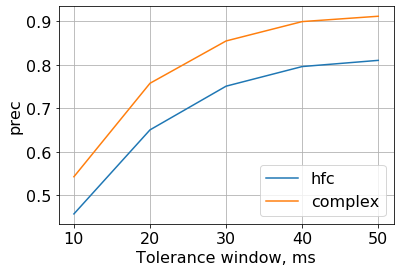

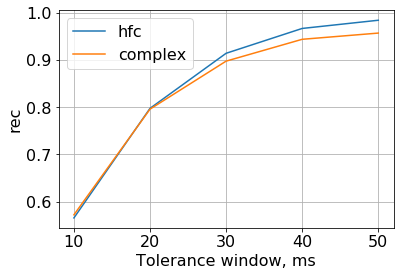

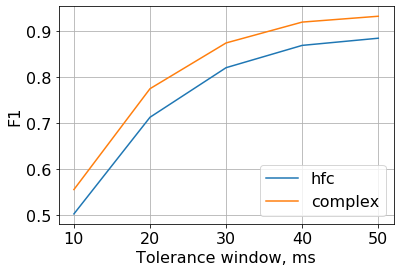

In [87]:
for metric in ['prec', 'rec', 'F1']:
    for method in ['hfc', 'complex']:
        plt.plot(windows, series[method][metric], label=method)
    plt.xticks(windows)
    plt.xlabel('Tolerance window, ms')
    plt.ylabel(metric)
    plt.grid(which='both')
    plt.legend()
    plt.show()